<a href="https://colab.research.google.com/github/msubhikshaT/HealthCare_Assgn/blob/main/HealthCare_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
df = pd.read_csv("/content/Healthcare-Diabetes.csv")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(2768, 10)

In [ ]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df["Outcome"].value_counts()/df.shape[0]

0    0.656069
1    0.343931
Name: Outcome, dtype: float64

In [ ]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
clean_df = df.copy()
clean_df.drop('Id', axis=1, inplace=True)

In [ ]:
clean_df.columns = clean_df.columns.str.lower()
clean_df.rename(columns={"diabetespedigreefunction": "pedigree", "outcome": "has_diabete"}, inplace=True)
clean_df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'pedigree', 'age', 'has_diabete'],
      dtype='object')

In [ ]:
print("{:.3}% of rows are duplicated.".format(clean_df.duplicated().sum() / clean_df.shape[0] * 100))

71.9% of rows are duplicated.


In [ ]:
clean_df = clean_df[~clean_df.duplicated()]
clean_df.shape

(778, 9)

In [ ]:
clean_df.isna().sum()

pregnancies      0
glucose          0
bloodpressure    0
skinthickness    0
insulin          0
bmi              0
pedigree         0
age              0
has_diabete      0
dtype: int64

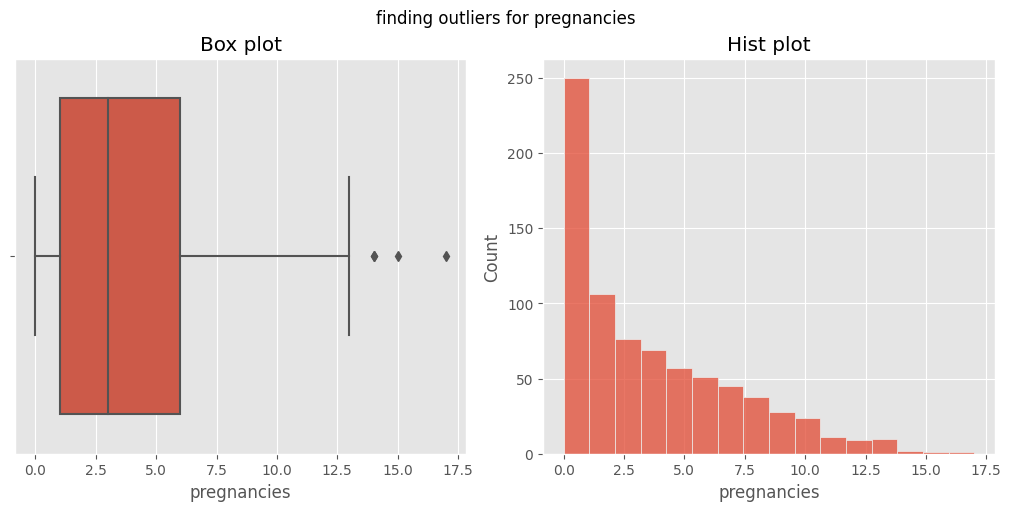

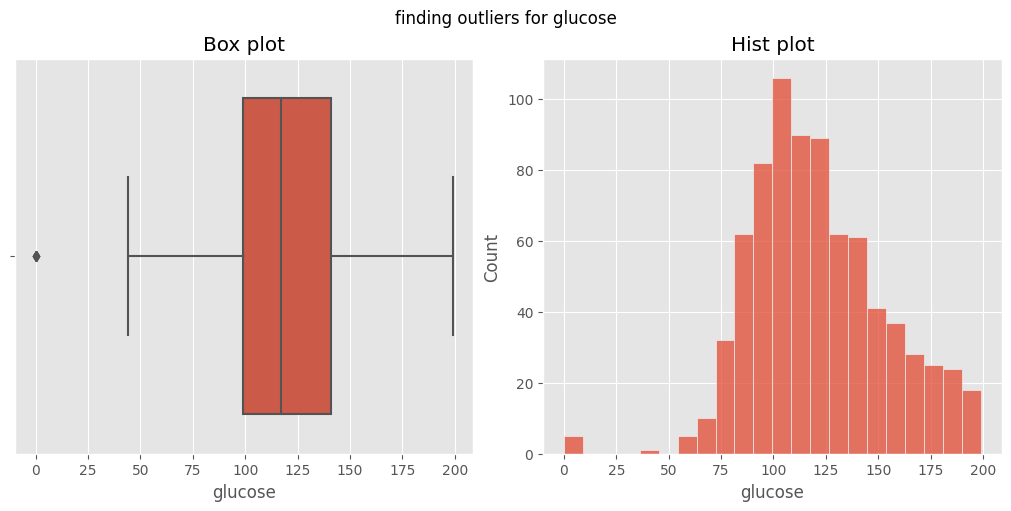

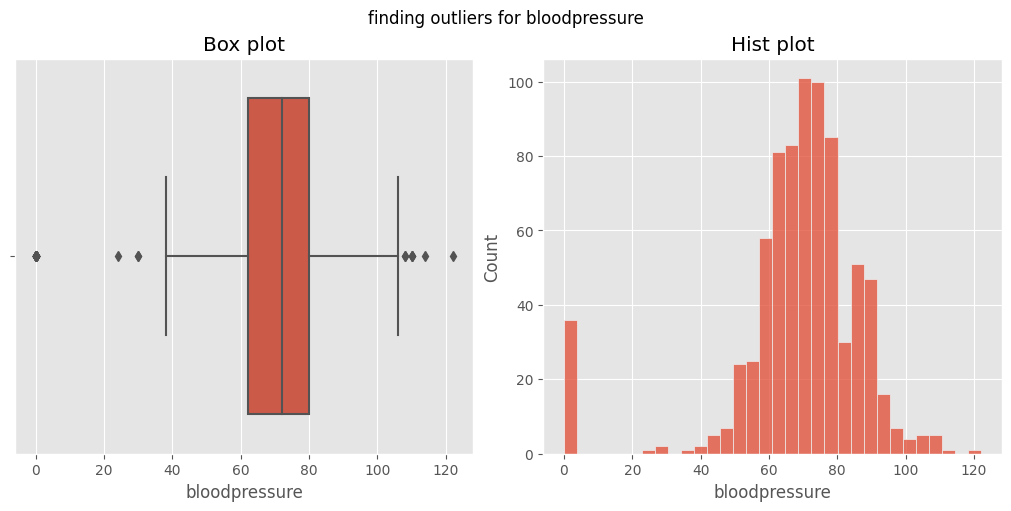

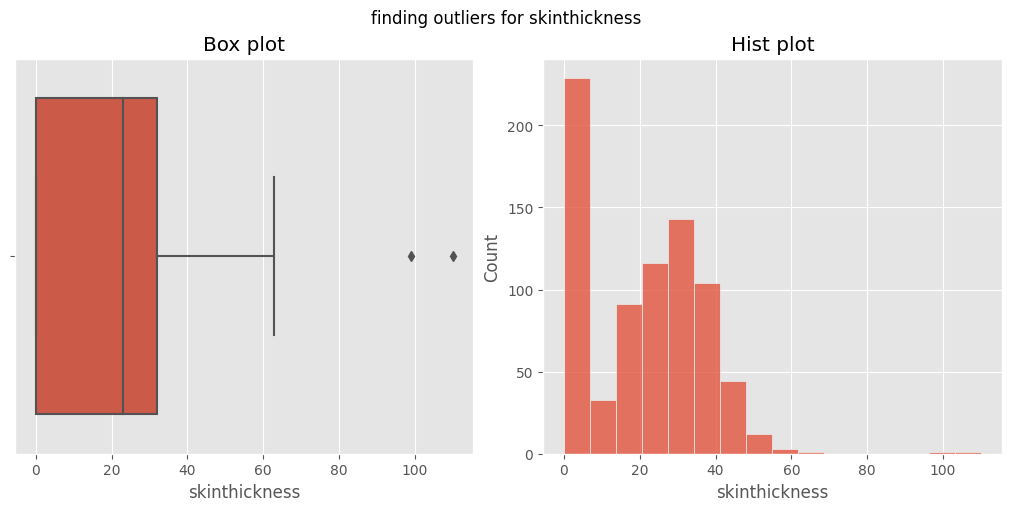

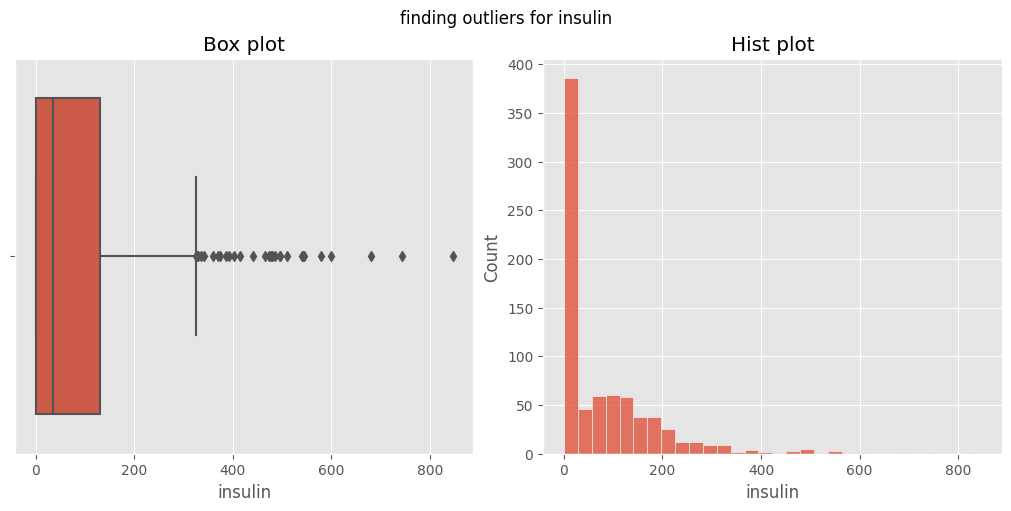

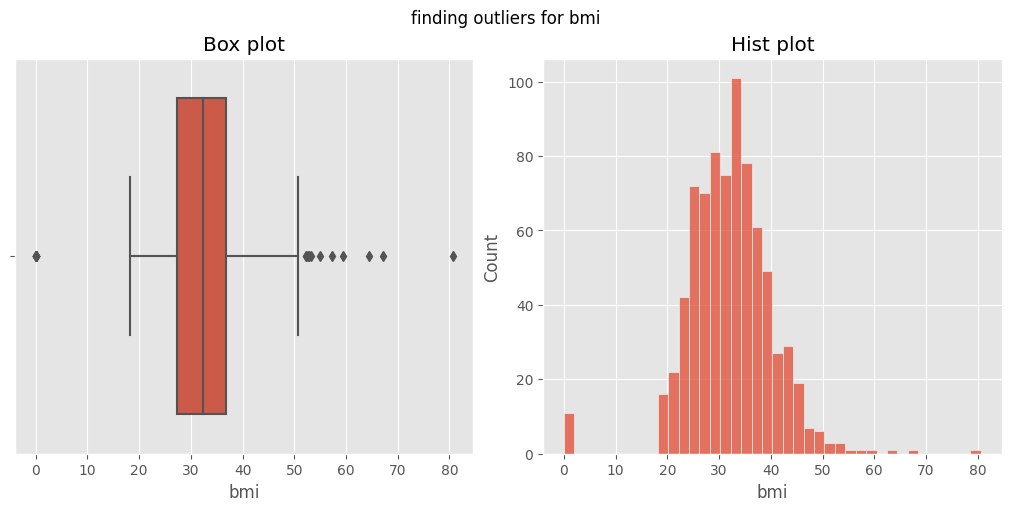

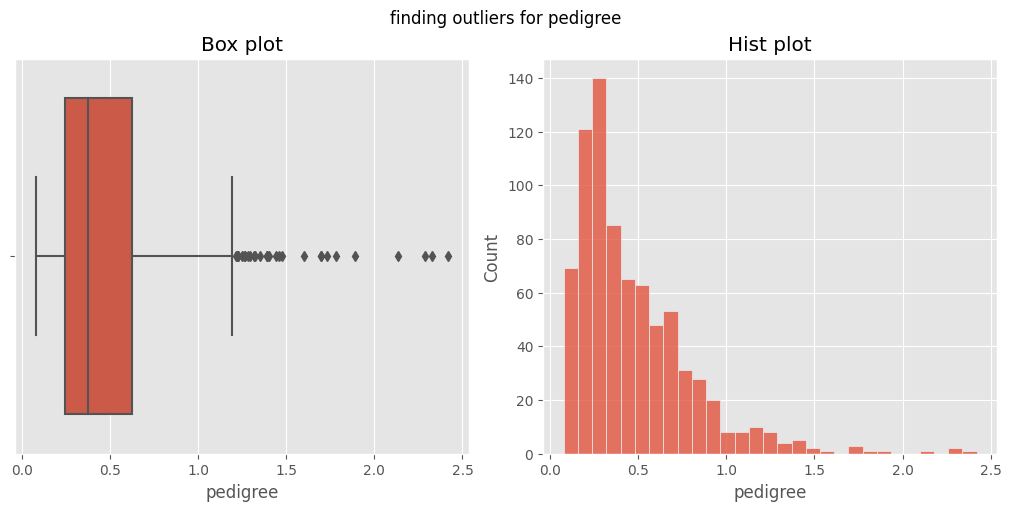

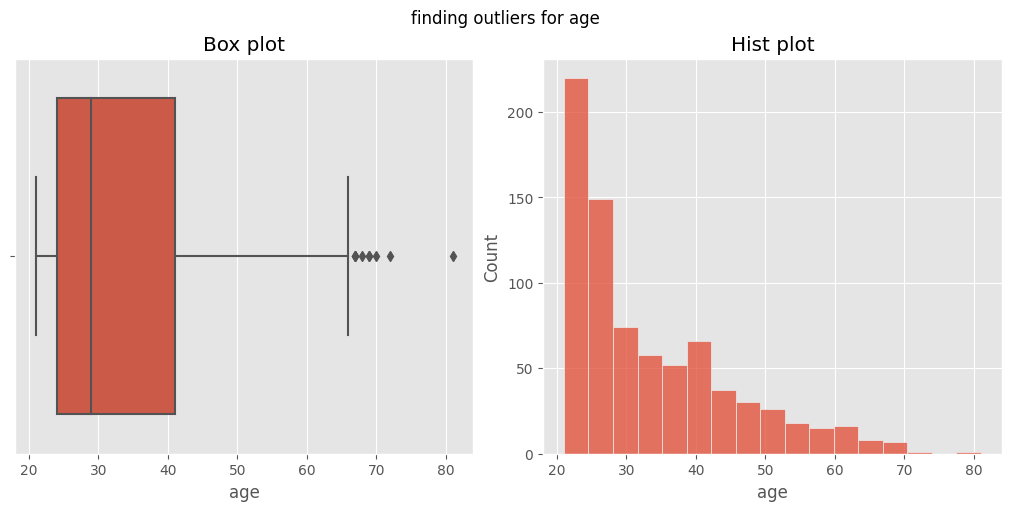

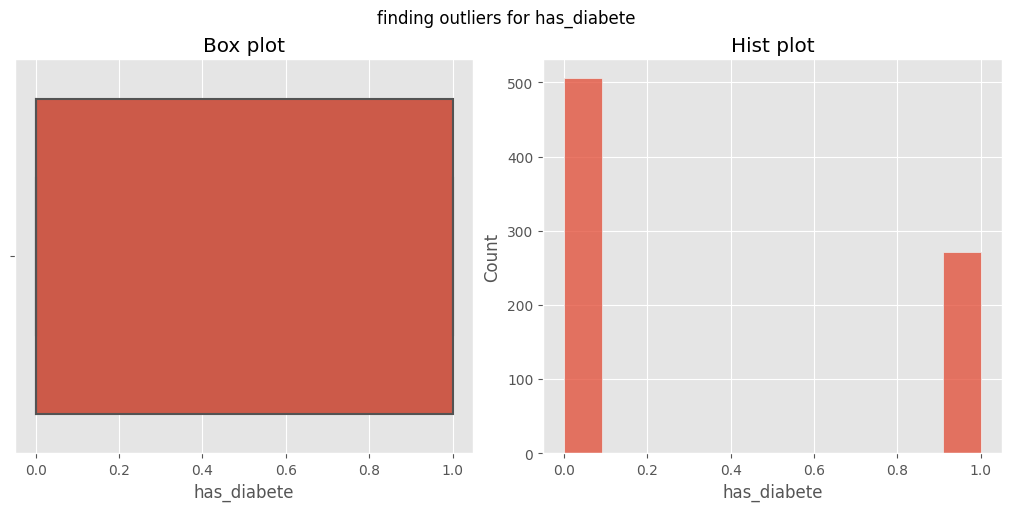

In [ ]:
def plot_outliers():
    for col_name in clean_df.columns:
        fig, ax = plt.subplots(1,2, constrained_layout=True)
        fig.set_size_inches(10,5)
        sns.boxplot(data=clean_df, x=col_name, ax=ax[0]).set(title="Box plot")
        sns.histplot(data=clean_df, x=col_name, ax=ax[1]).set(title="Hist plot")
        plt.suptitle("finding outliers for {}".format(col_name))
        plt.show()

plot_outliers()

In [ ]:
df2 = clean_df.copy()

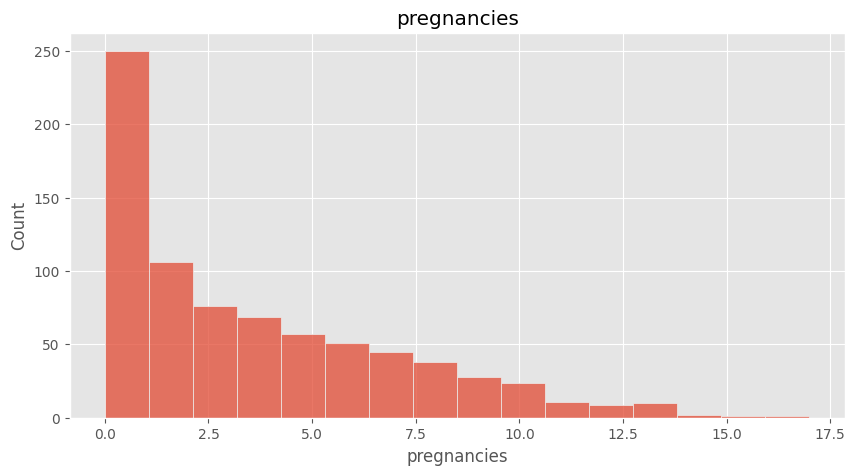

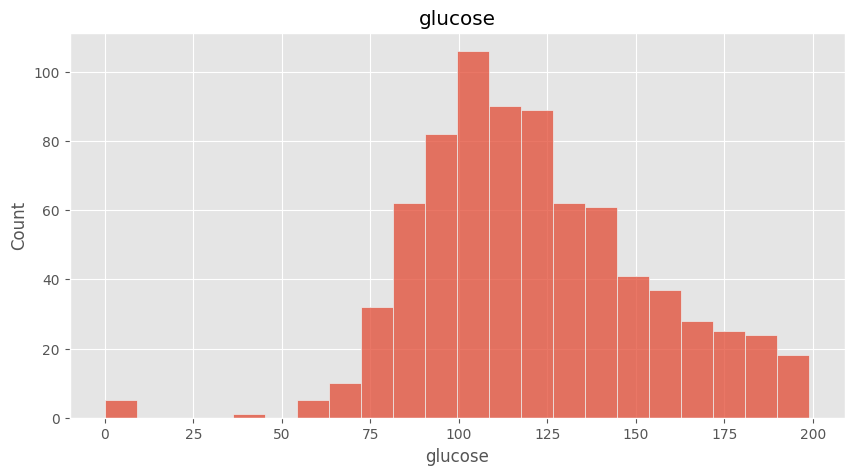

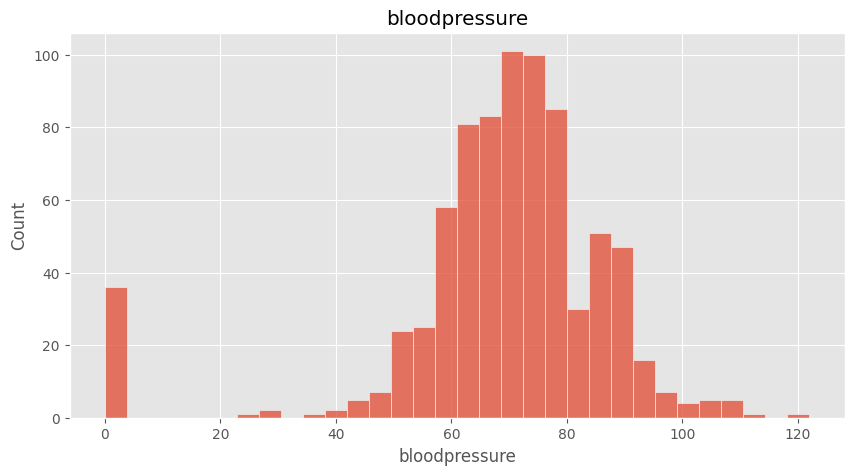

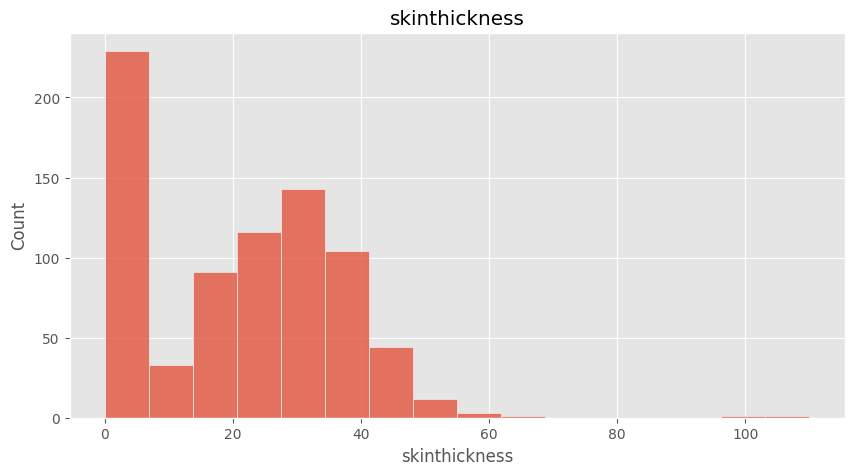

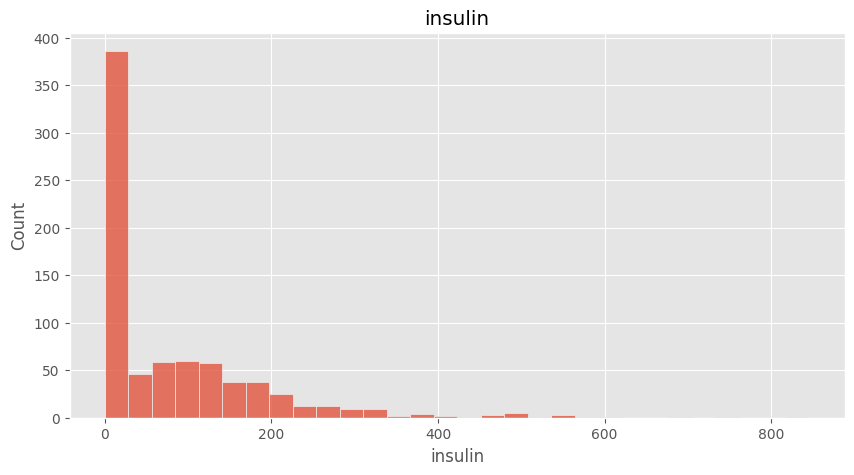

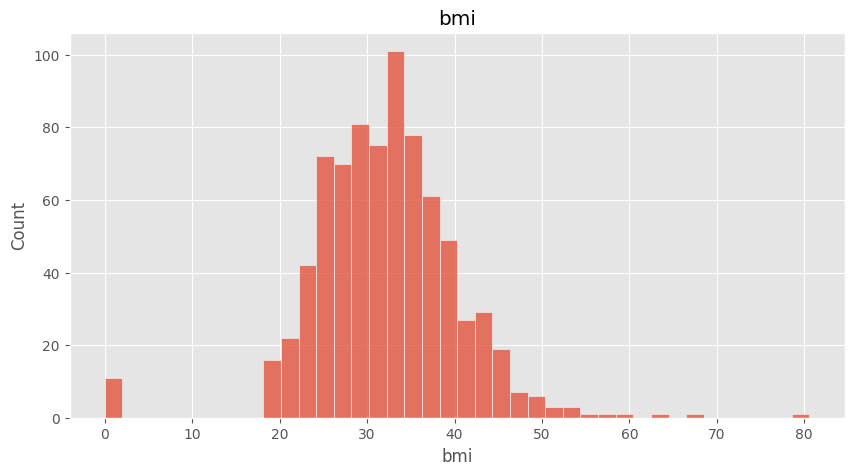

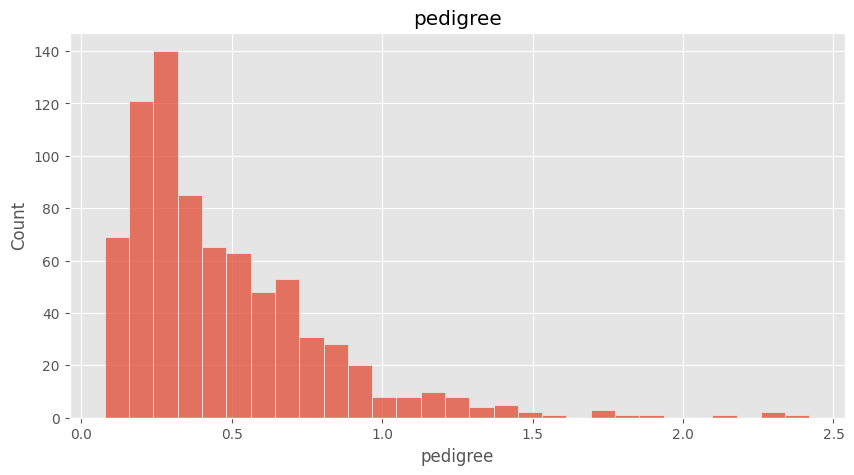

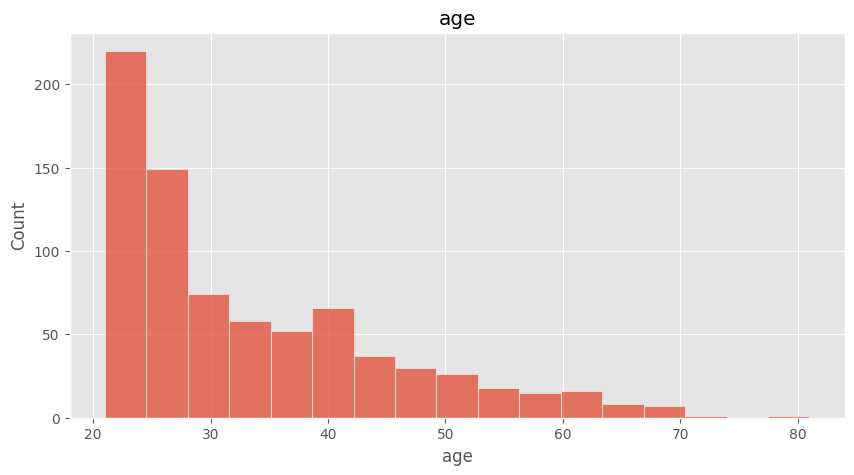

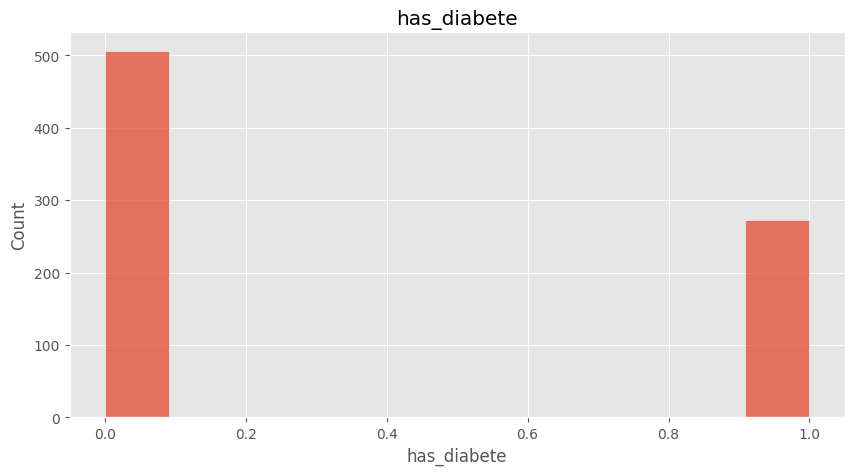

In [ ]:
for col_name in df2.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df2, x=col_name).set(title=col_name)

<Figure size 1400x700 with 0 Axes>

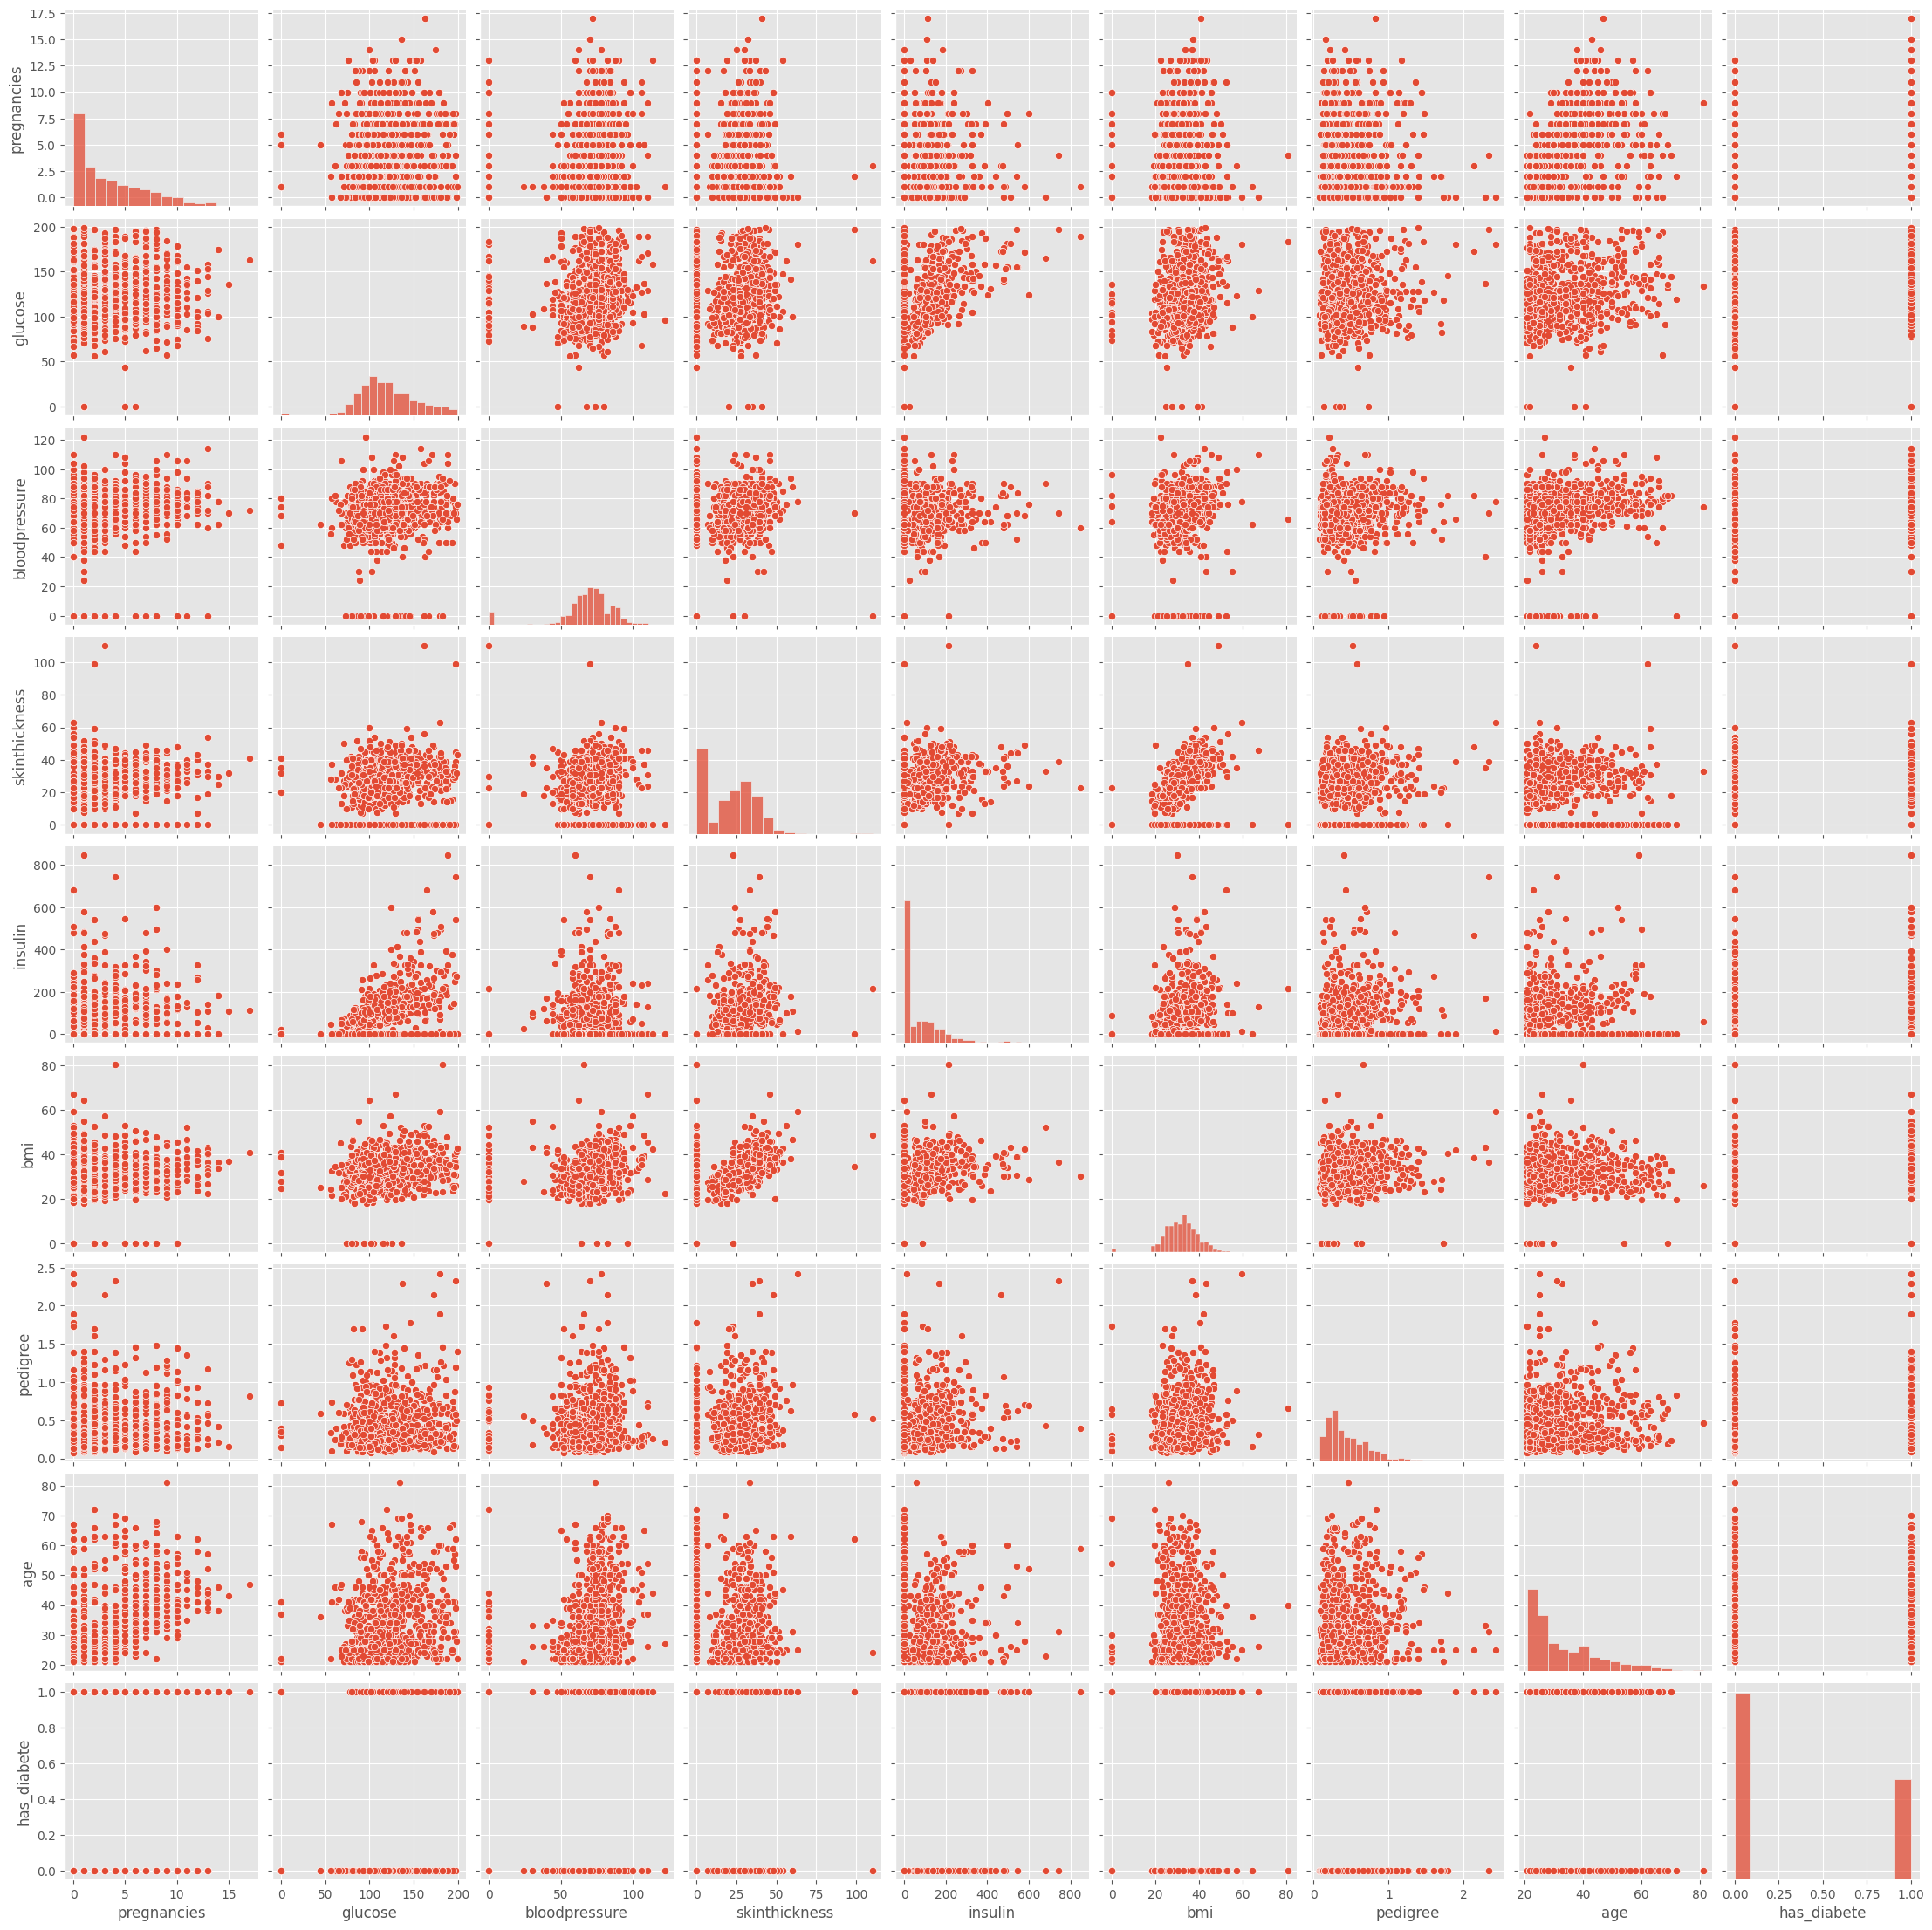

In [ ]:
plt.figure(figsize=(14,7))
sns.pairplot(data=df2)
plt.show()

In [ ]:
df2_corr = df2.corr()
df2_corr

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,pedigree,age,has_diabete
pregnancies,1.000000,0.124729,0.143599,-0.085663,-0.076876,0.010874,-0.034159,0.532993,0.220380
glucose,0.124729,1.000000,0.140420,0.067604,0.333652,0.231745,0.137337,0.262591,0.459152
bloodpressure,0.143599,0.140420,1.000000,0.178080,0.082516,0.249552,0.042145,0.243475,0.073921
skinthickness,-0.085663,0.067604,0.178080,1.000000,0.434904,0.367135,0.182582,-0.101986,0.078016
insulin,-0.076876,0.333652,0.082516,0.434904,1.000000,0.195511,0.190193,-0.038262,0.127030
bmi,0.010874,0.231745,0.249552,0.367135,0.195511,1.000000,0.130382,0.043150,0.264761
pedigree,-0.034159,0.137337,0.042145,0.182582,0.190193,0.130382,1.000000,0.034839,0.172160
age,0.532993,0.262591,0.243475,-0.101986,-0.038262,0.043150,0.034839,1.000000,0.244260
has_diabete,0.220380,0.459152,0.073921,0.078016,0.127030,0.264761,0.172160,0.244260,1.000000


<Axes: >

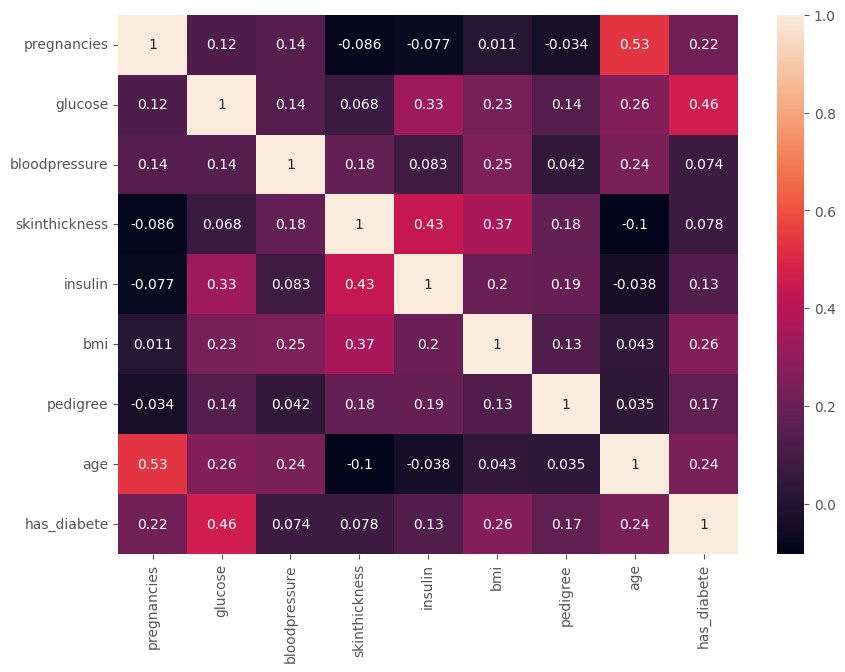

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df2_corr, annot=True)

In [ ]:
df2_corr["has_diabete"]

pregnancies      0.220380
glucose          0.459152
bloodpressure    0.073921
skinthickness    0.078016
insulin          0.127030
bmi              0.264761
pedigree         0.172160
age              0.244260
has_diabete      1.000000
Name: has_diabete, dtype: float64

In [ ]:
df_positive = df2.query('has_diabete == 1')
df_negative = df2.query('has_diabete == 0')

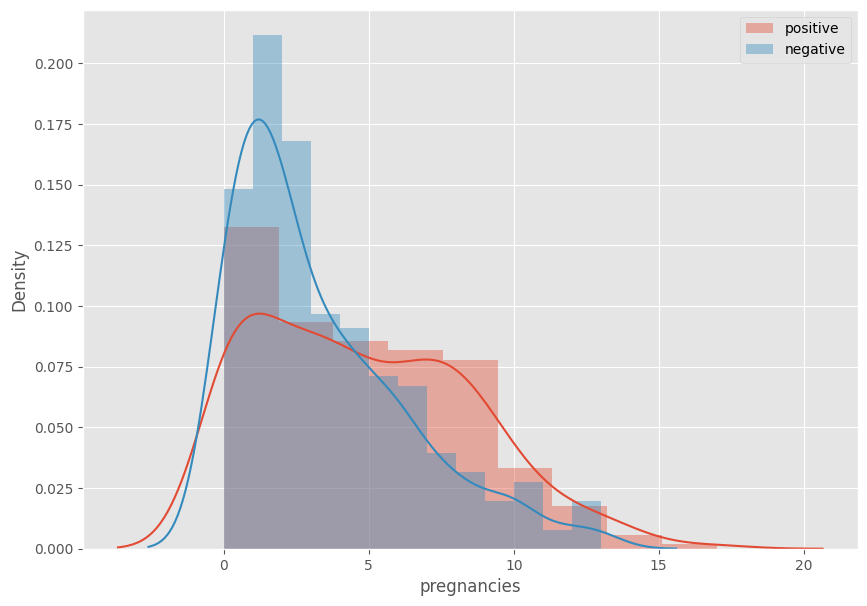

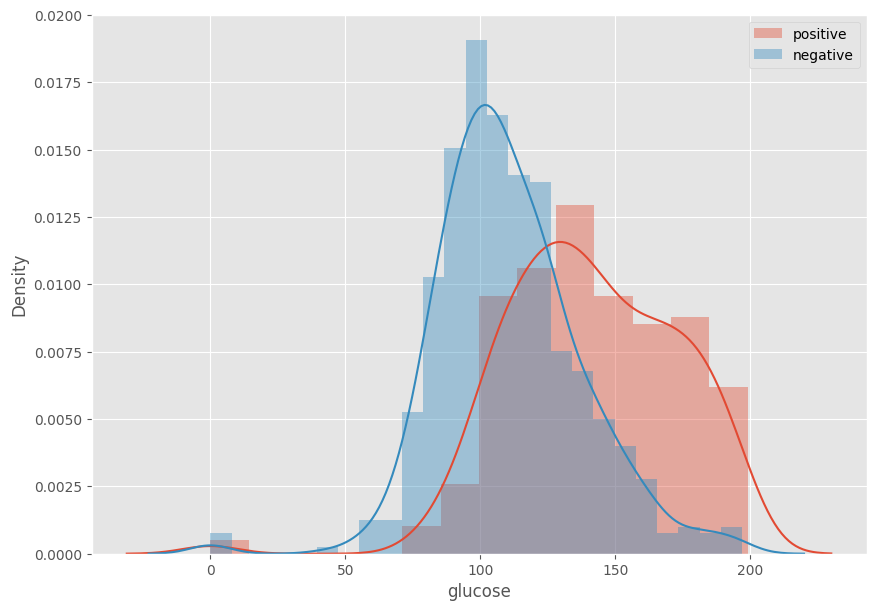

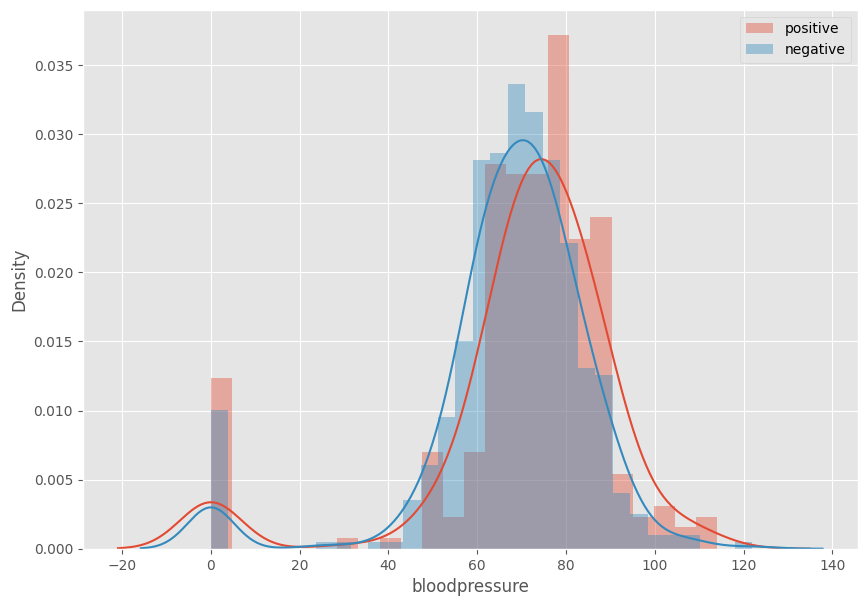

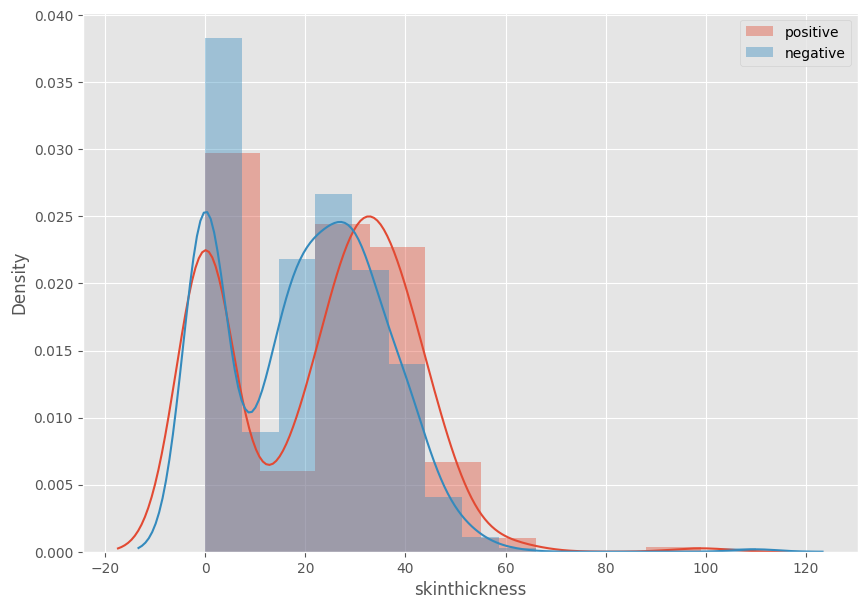

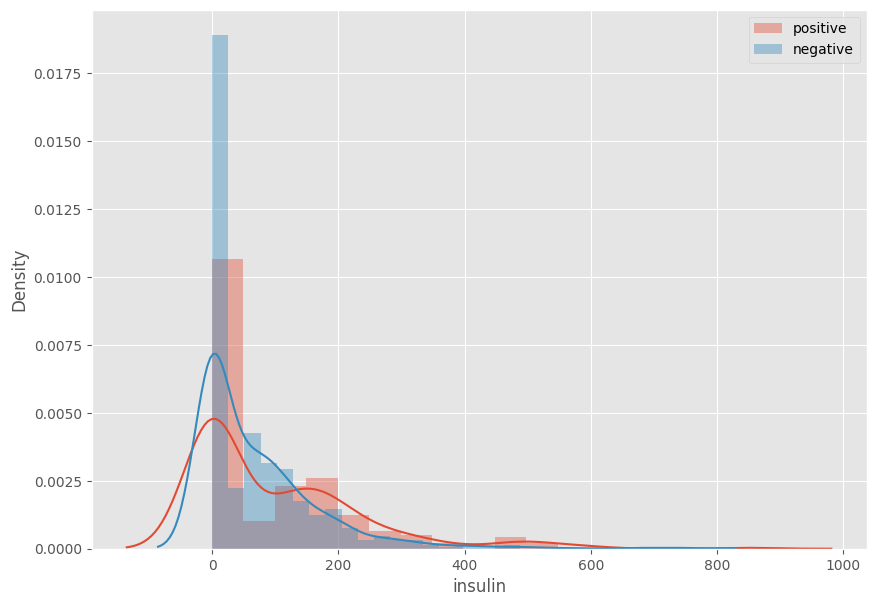

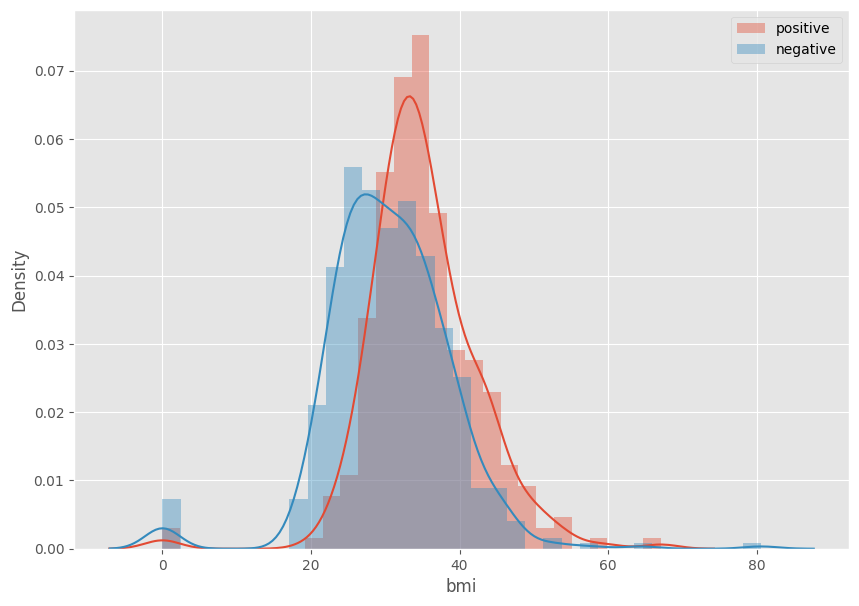

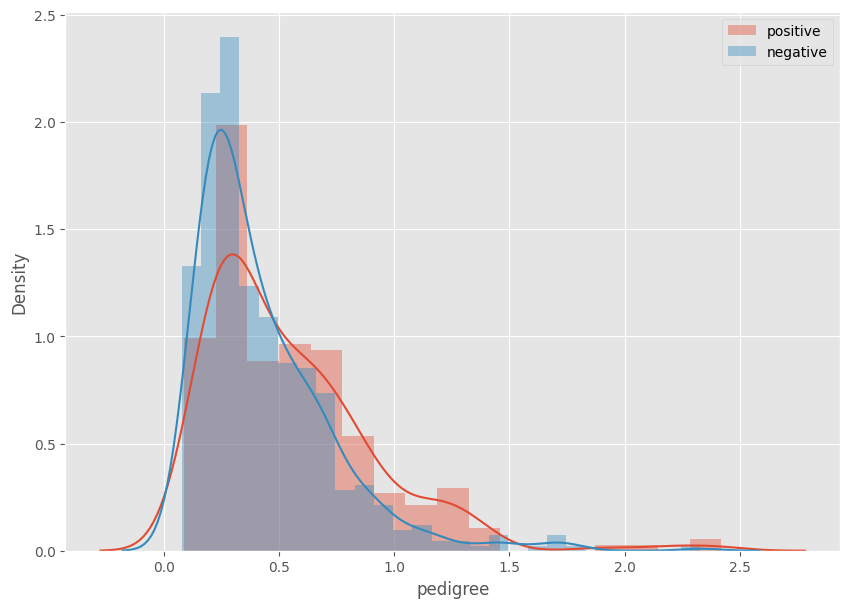

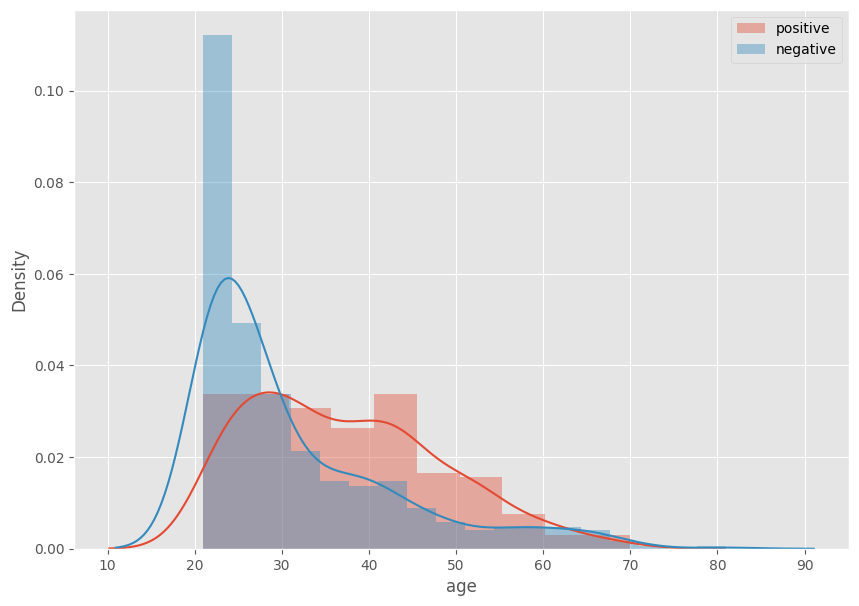

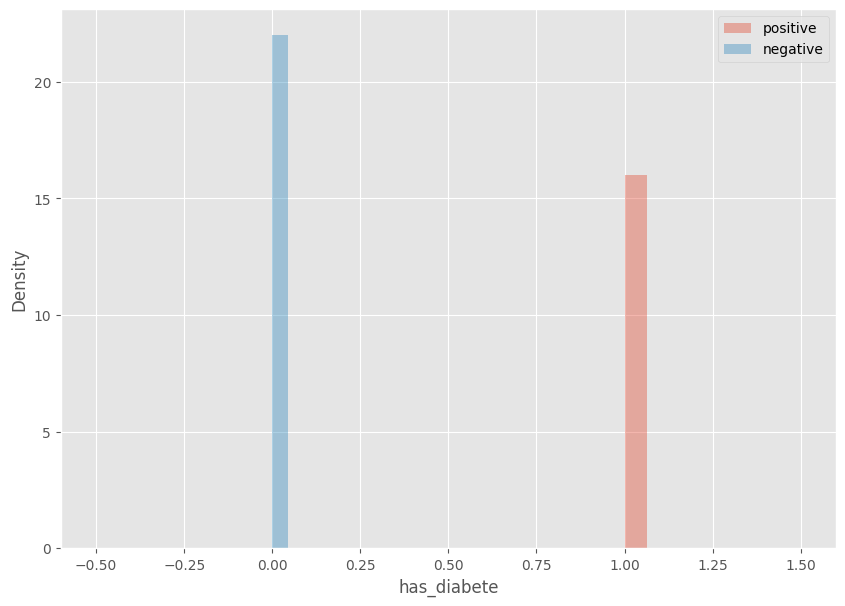

In [ ]:
for col_name in df2.columns:
    plt.figure(figsize=(10,7))
    sns.distplot(df_positive[col_name], label="positive")
    sns.distplot(df_negative[col_name], label="negative")
    plt.legend()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
y = df2['has_diabete']
X = df2.drop(['has_diabete'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled

array([[ 0.91915633,  0.4404984 ,  0.25362241, ..., -0.74383548,
         0.49766104,  1.50954763],
       [ 1.21264465,  1.86242783, -0.04984628, ..., -0.26300376,
         0.40409428,  2.28332729],
       [-0.84177356, -0.79184045, -0.04984628, ..., -0.60310425,
         1.80759572, -0.98374238],
       ...,
       [ 1.79962128,  0.21930937, -0.35331497, ...,  1.03876019,
        -0.104675  ,  0.3918659 ],
       [-1.13526187,  0.18771094, -0.04984628, ..., -0.21609334,
         2.67308828, -0.72581582],
       [ 0.03869139, -0.38106083, -0.15100251, ..., -0.0519069 ,
        -0.01695616, -0.38191375]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline

In [ ]:
def evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, validation_score = learning_curve(model, X_train, y_train, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 5))
    plt.figure(figsize=(10,7))
    plt.title("F1 score")
    plt.plot(N, train_score.mean(axis=1), label="Train score")
    plt.plot(N, validation_score.mean(axis=1), label="Validation score")
    plt.legend()
    plt.show()

In [ ]:
preprocessing = make_pipeline(SelectKBest(f_classif, k=5))
preprocessing

Pipeline(steps=[('selectkbest', SelectKBest(k=5))])

In [ ]:
randomForest = make_pipeline(preprocessing, RandomForestClassifier(random_state=0, max_depth=15))
adaBoost = make_pipeline(preprocessing, AdaBoostClassifier(random_state=0))
gradientBoost = make_pipeline(preprocessing, GradientBoostingClassifier(random_state=0))
decisionTree = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=0))
#models based on tree don't need to be scaled
svm = make_pipeline(preprocessing, StandardScaler(), SVC(random_state=0))
models = {'randomForest': randomForest, 'adaBoost': adaBoost, 'gradientBoost': gradientBoost, 'decisionTree' : decisionTree, 'svm' : svm}

randomForest
[[91 13]
 [22 30]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.70      0.58      0.63        52

    accuracy                           0.78       156
   macro avg       0.75      0.73      0.74       156
weighted avg       0.77      0.78      0.77       156



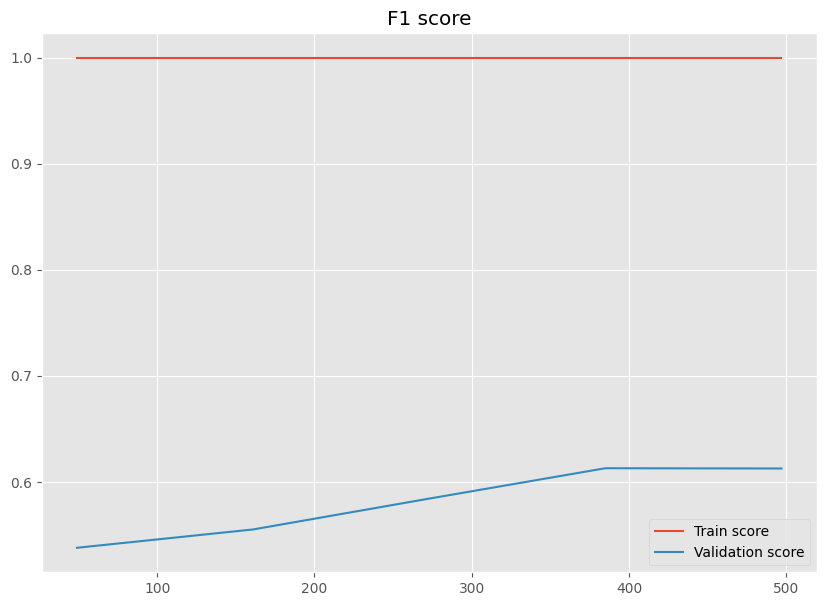

adaBoost
[[90 14]
 [20 32]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       104
           1       0.70      0.62      0.65        52

    accuracy                           0.78       156
   macro avg       0.76      0.74      0.75       156
weighted avg       0.78      0.78      0.78       156



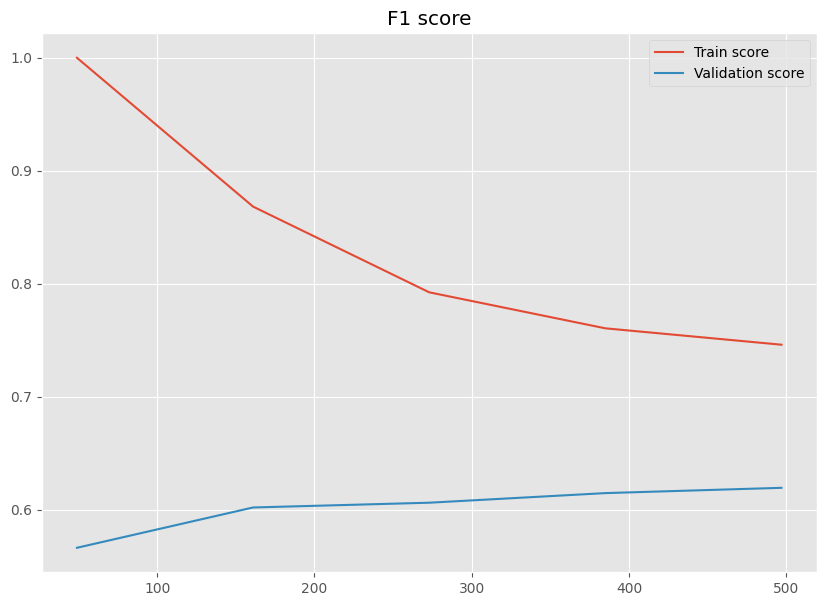

gradientBoost
[[88 16]
 [22 30]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       104
           1       0.65      0.58      0.61        52

    accuracy                           0.76       156
   macro avg       0.73      0.71      0.72       156
weighted avg       0.75      0.76      0.75       156



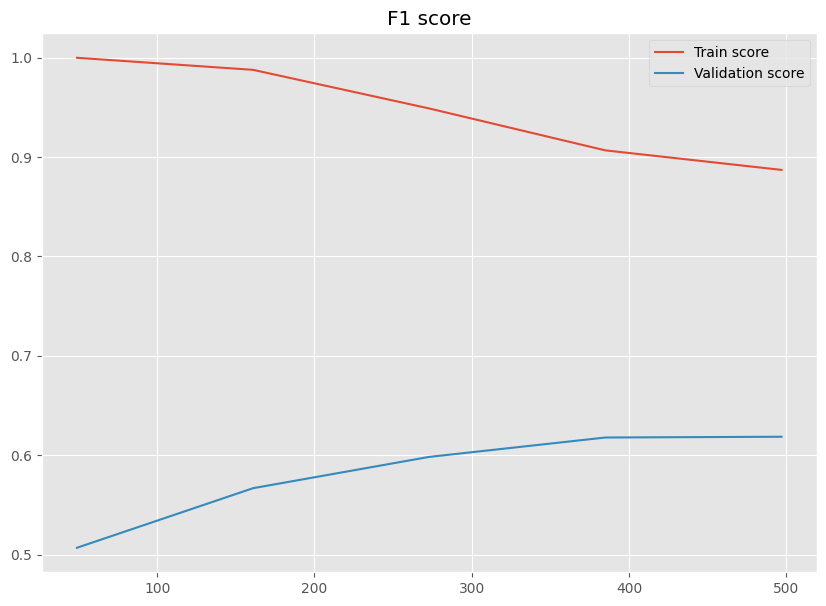

decisionTree
[[80 24]
 [25 27]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       104
           1       0.53      0.52      0.52        52

    accuracy                           0.69       156
   macro avg       0.65      0.64      0.64       156
weighted avg       0.68      0.69      0.69       156



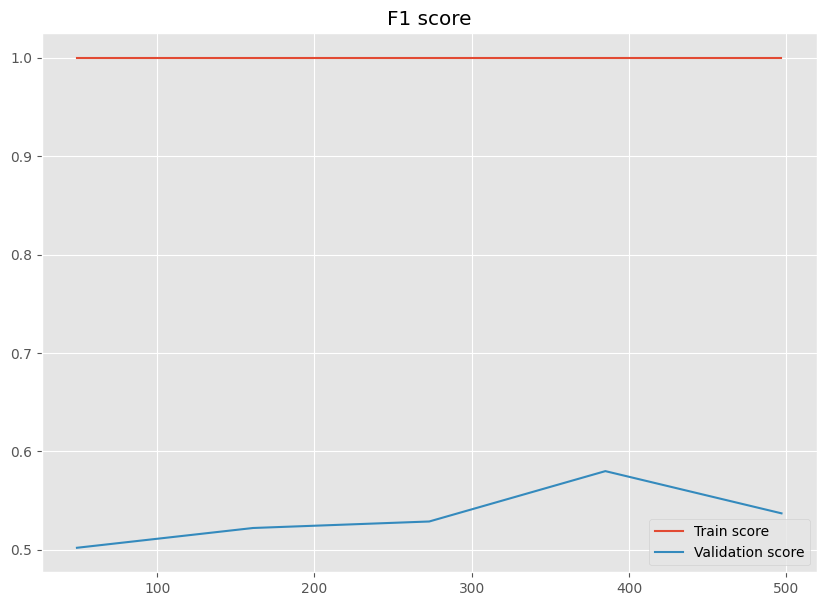

svm
[[93 11]
 [24 28]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       104
           1       0.72      0.54      0.62        52

    accuracy                           0.78       156
   macro avg       0.76      0.72      0.73       156
weighted avg       0.77      0.78      0.77       156



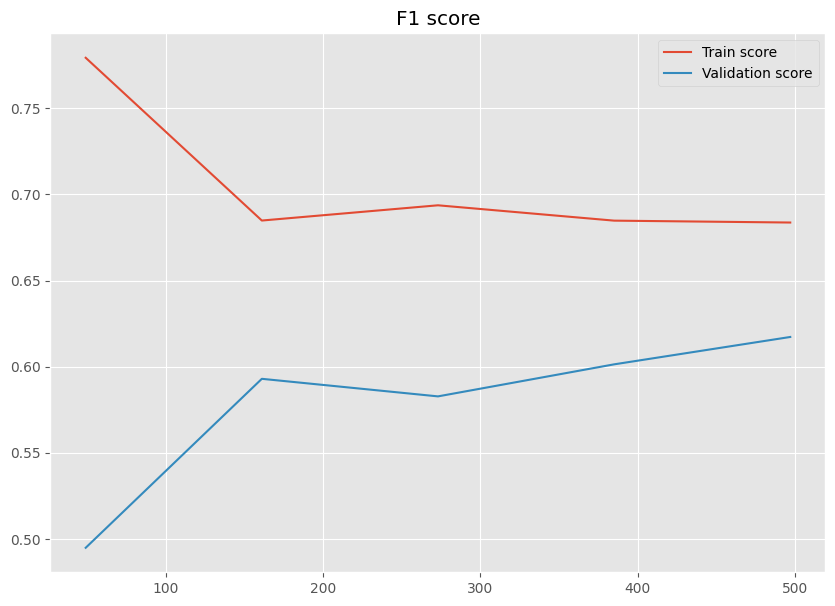

In [ ]:
for name,model in models.items():
    print(name)
    evaluate(model)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_ada_boost = {
    'pipeline__selectkbest__k': [5,6,7],
    'adaboostclassifier__n_estimators': [400,450, 460],
    'adaboostclassifier__learning_rate': [0.01],
    'adaboostclassifier__base_estimator': [DecisionTreeClassifier(max_depth=2)]
}

grid_ada_boost = GridSearchCV(estimator=adaBoost,param_grid=param_grid_ada_boost, scoring='recall', cv=5)

[]

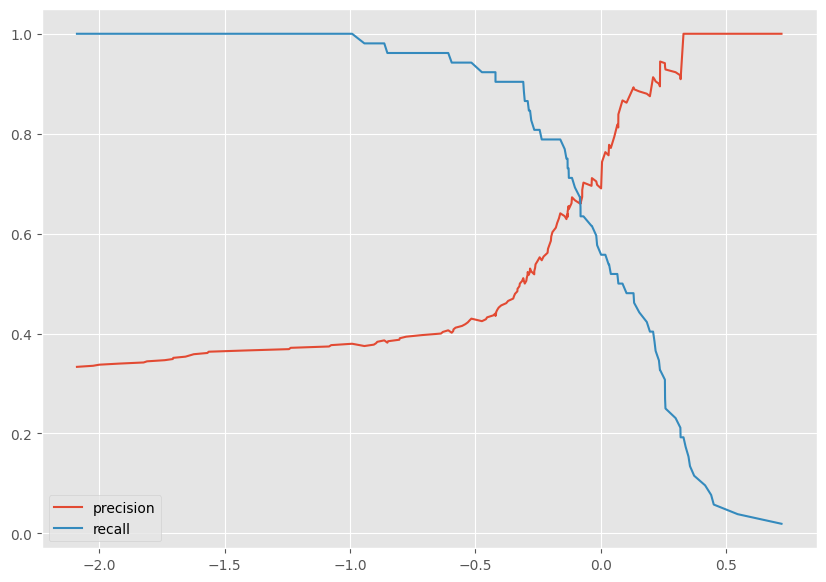

In [ ]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
precision, recall, threshold = precision_recall_curve(y_test, grid_ada_boost.best_estimator_.decision_function(X_test))
plt.figure(figsize=(10,7))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()
plt.plot()

In [ ]:
grid_ada_boost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('selectkbest',
                                                         SelectKBest(k=5))])),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid={'adaboostclassifier__base_estimator': [DecisionTreeClassifier(max_depth=2)],
                         'adaboostclassifier__learning_rate': [0.01],
                         'adaboostclassifier__n_estimators': [400, 450, 460],
                         'pipeline__selectkbest__k': [5, 6, 7]},
             scoring='recall')

In [ ]:
def final_model(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = final_model(grid_ada_boost.best_estimator_, X_test, threshold=-0.1)
y_pred

array([False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False,

In [ ]:
recall_score(y_test, y_pred)

0.6730769230769231

In [ ]:
precision_score(y_test, y_pred)

0.660377358490566